In [258]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import re
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score
import time
from sklearn.metrics import accuracy_score, f1_score
from sklearn.linear_model import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from tensorflow import keras
from tensorflow.keras import layers

## Part 1: Data Exploration and Preparation

#### Q1: Dataset Overview

In [259]:
df = pd.read_csv("data.csv")

COMP4211 - Assignment 1

In [260]:
#Overview of dataset (first 5 rows)

df.head(5)

,c1,c2,c3,c4,c5,c6,c7,c8,c9,reg_target,class_target
0,male,22.0,1,0,A/5 21171,NaN,S,Lower Class,"Braund, Mr. Owen Harris",7.2500,0
1,female,38.0,1,0,PC 17599,C85,C,Upper Class,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,1
2,female,26.0,0,0,STON/O2. 3101282,NaN,S,Lower Class,"Heikkinen, Miss. Laina",7.9250,1
3,female,35.0,1,0,113803,C123,S,Upper Class,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,1
4,male,35.0,0,0,373450,NaN,S,Lower Class,"Allen, Mr. William Henry",8.0500,0


In [261]:
# Number of rows and columns in dataset

print(f"Shape of dataframe: {df.shape}")

Shape of dataframe: (891, 11)


In [262]:
# Size of dataset (total number of elements in the DataFrame)

print(f"The size of the dataset: {df.size}")

The size of the dataset: 9801


In [263]:
# Missing values for each column

missing_values = df.isna().sum()
missing_values

c1                0
c2              177
c3                0
c4                0
c5                0
c6              687
c7                2
c8                0
c9                0
reg_target        0
class_target      0
dtype: int64

In [264]:
# Proportion of missing values

total_values = df.shape[0]


proportion_missing = missing_values / total_values

proportion_missing

c1              0.000000
c2              0.198653
c3              0.000000
c4              0.000000
c5              0.000000
c6              0.771044
c7              0.002245
c8              0.000000
c9              0.000000
reg_target      0.000000
class_target    0.000000
dtype: float64

## Q2: Feature Distribution

#### Numerical Features

In [265]:
# Column data types

df.dtypes

c1               object
c2              float64
c3                int64
c4                int64
c5               object
c6               object
c7               object
c8               object
c9               object
reg_target      float64
class_target      int64
dtype: object

In [266]:
# Select numerical feature names only (excluding data)
numerical_features = df.select_dtypes(include=["int64", "float64"]).columns.tolist()

# Drop 'class_target' if it's mistakenly interpreted as numerical
numerical_features = [col for col in numerical_features if col != "class_target"]

# Checking for continuous and discrete features
continuous_features = []
discrete_features = []

for col in numerical_features:  # Loop only through numerical features
    unique_values = df[col].nunique()
    
    if unique_values < 10:  # Less than 10 unique values → discrete
        discrete_features.append(col)
    else:  # Otherwise → continuous
        continuous_features.append(col)

print("Numerical Features:", numerical_features) # first-in-order numerical feature is c2.
print("Continuous Features:", continuous_features)
print("Discrete Features:", discrete_features)


Numerical Features: ['c2', 'c3', 'c4', 'reg_target']
Continuous Features: ['c2', 'reg_target']
Discrete Features: ['c3', 'c4']


In [267]:
# Summarize statistical distribution of all numerical features

df[numerical_features].describe()

,c2,c3,c4,reg_target
count,714.000000,891.000000,891.000000,891.000000
mean,29.699118,0.523008,0.381594,32.204208
std,14.526497,1.102743,0.806057,49.693429
min,0.420000,0.000000,0.000000,0.000000
25%,20.125000,0.000000,0.000000,7.910400
50%,28.000000,0.000000,0.000000,14.454200
75%,38.000000,1.000000,0.000000,31.000000
max,80.000000,8.000000,6.000000,512.329200


c2


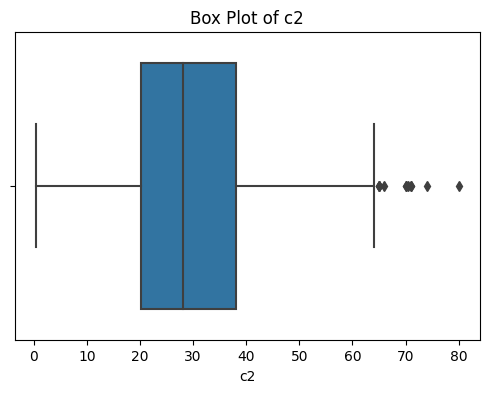

In [268]:
# Visualizing first-in-order numerical feature using a boxplot.

first_feature = numerical_features[0]   # feature c2
print(first_feature)

# Create a box plot for the first numerical feature
plt.figure(figsize=(6, 4))
sns.boxplot(x=df[first_feature])  # Fix: Use df[first_feature] to access the data
plt.title(f"Box Plot of {first_feature}")
plt.xlabel(first_feature)
plt.show()

#### Categorical Features

In [269]:
# The Categorical Features are the ones that are not numerical.

categorical_features = df.select_dtypes(exclude=["int64", "float64"])
list_categorical_features = df.select_dtypes(exclude=["int64", "float64"]).columns.tolist()
list_categorical_features.append("class_target")
#print(categorical_features)

'''
c1 represents gender, and is binary because it can only take two values: male/female
c5 is categorical and nominal, because it does not have a specific order.
c6 is categotical and nominal, because it does not have a specific order.
c7 is categorical and nominal, because it does not have a specific order.
c8 is categorical and ordinal. This cateogry can be ordered in a specific order: lower class --> middle class --> upper class
c9 is categorical and nominal, because it does not have a specific order.
class_target is categorical and binary. This cateogory takes either value 0 or 1.
'''

'\nc1 represents gender, and is binary because it can only take two values: male/female\nc5 is categorical and nominal, because it does not have a specific order.\nc6 is categotical and nominal, because it does not have a specific order.\nc7 is categorical and nominal, because it does not have a specific order.\nc8 is categorical and ordinal. This cateogry can be ordered in a specific order: lower class --> middle class --> upper class\nc9 is categorical and nominal, because it does not have a specific order.\nclass_target is categorical and binary. This cateogory takes either value 0 or 1.\n'

Binary Features: ['c1', 'class_target']
Nominal Features: ['c5', 'c6', 'c7', 'c8', 'c9']
Count of Categories for Each Categorical Feature:
 c1                2
c5              681
c6              147
c7                3
c8                3
c9              891
class_target      2
dtype: int64


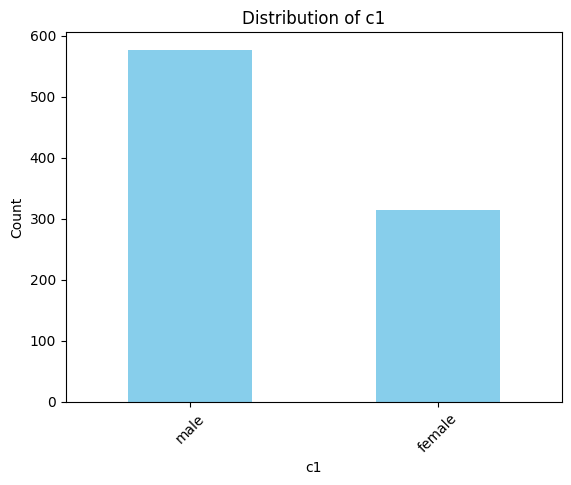

In [270]:
# Assuming df is your DataFrame and categorical_features is a list of your categorical columns
categorical_features = ['c1', 'c5', 'c6', "c7", "c8", "c9", "class_target"]  # Replace with your actual categorical features

# Identify the type of each categorical feature
binary_features = [col for col in categorical_features if df[col].nunique() == 2]
nominal_features = [col for col in categorical_features if df[col].nunique() > 2 and not df[col].dtype.name == 'category']
ordinal_features = [col for col in categorical_features if df[col].dtype.name == 'category']

print("Binary Features:", binary_features)
print("Nominal Features:", nominal_features)
#print("Ordinal Features:", ordinal_features)

# Summarize the count of categories for all categorical features
category_counts = df[categorical_features].nunique()
print("Count of Categories for Each Categorical Feature:\n", category_counts)

# Visualize the distribution of the first-in-order categorical feature using bar plots
first_categorical_feature = categorical_features[0]
df[first_categorical_feature].value_counts().plot(kind='bar', color='skyblue')

plt.title(f'Distribution of {first_categorical_feature}')
plt.xlabel(first_categorical_feature)
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

## Q3: Correlation Analysis

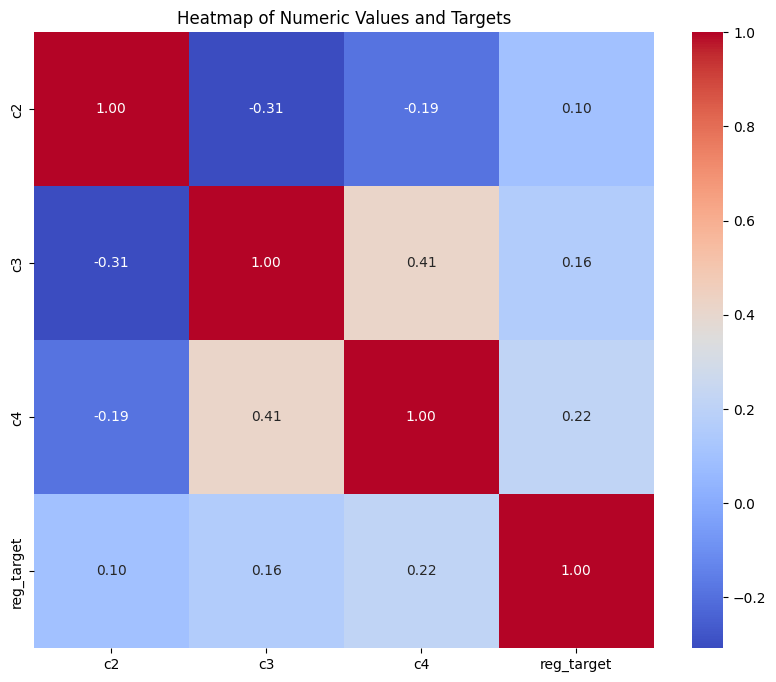

In [271]:
### Need to fix perfect correlation problem between identical features.

#additional_features = df[["reg_target", "class_target"]]

# Concatenate the numerical features with the additional features
correlation_features = df[numerical_features]  # Select numerical columns correctly

# Calculate the correlation matrix
correlation_matrix = correlation_features.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title("Heatmap of Numeric Values and Targets")
plt.show()

In [272]:
#### There is somethig wrong here

'''

# Highlighting strong or weak correlations.

strong_threshold = 0.8
weak_threshold = -0.8

# Identify strong correlations
strong_correlations = correlation_matrix[(correlation_matrix.abs() > strong_threshold) & (correlation_matrix.abs() < 1.0)]

# Identify weak correlations
weak_correlations = correlation_matrix[(correlation_matrix.abs() < weak_threshold) & (correlation_matrix.abs() > 0)]

# Extract pairs of features with strong correlations
strong_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j]) 
                for i in range(len(correlation_matrix)) 
                for j in range(i+1, len(correlation_matrix)) 
                if abs(correlation_matrix.iloc[i, j]) > strong_threshold]

# Extract pairs of features with weak correlations
weak_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j]) 
              for i in range(len(correlation_matrix)) 
              for j in range(i+1, len(correlation_matrix)) 
              if 0 < abs(correlation_matrix.iloc[i, j]) < weak_threshold]

print("Pairs of Features with Strong Correlations:", strong_pairs)
print("Pairs of Features with Weak Correlations:", weak_pairs)
'''

'\n\n# Highlighting strong or weak correlations.\n\nstrong_threshold = 0.8\nweak_threshold = -0.8\n\n# Identify strong correlations\nstrong_correlations = correlation_matrix[(correlation_matrix.abs() > strong_threshold) & (correlation_matrix.abs() < 1.0)]\n\n# Identify weak correlations\nweak_correlations = correlation_matrix[(correlation_matrix.abs() < weak_threshold) & (correlation_matrix.abs() > 0)]\n\n# Extract pairs of features with strong correlations\nstrong_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j]) \n                for i in range(len(correlation_matrix)) \n                for j in range(i+1, len(correlation_matrix)) \n                if abs(correlation_matrix.iloc[i, j]) > strong_threshold]\n\n# Extract pairs of features with weak correlations\nweak_pairs = [(correlation_matrix.index[i], correlation_matrix.columns[j]) \n              for i in range(len(correlation_matrix)) \n              for j in range(i+1, len(correlation_matrix)) \n              

## Part 2: Data Preprocessing Techniques

#### [Q4] Handling missing values

Remove c6
Use median/mean on the other missing columns

In [273]:
# Dropping feature c6 because it has >70% NaN values
df = df.drop(["c6"], axis=1)

# Median imputation for c2 because it has a moderate amount of missing values.
median_imputer = SimpleImputer(strategy='median')
df['c2'] = median_imputer.fit_transform(df[['c2']])  # Ensure 2D input

# Mode imputation for c7 because it has a small amount of missing values.
mode_imputer = SimpleImputer(strategy='most_frequent')
df['c7'] = mode_imputer.fit_transform(df[['c7']]).ravel()  # Flatten to 1D

# No more missing values.
print(df.isna().sum())


c1              0
c2              0
c3              0
c4              0
c5              0
c7              0
c8              0
c9              0
reg_target      0
class_target    0
dtype: int64


#### [Q5] Normalization and Standardization of first-in-order feature

In [274]:
first_feature = 'c2'

# Display the first 10 samples before processing
print("Before processing:")
print(df[first_feature].head(10))

# Create a new dataframe that will not include the scaled values
df_scaled = df.copy()  # Create a copy of the original dataframe

# Standard Scaling
standard_scaler = StandardScaler()
df_scaled[first_feature + '_standard'] = standard_scaler.fit_transform(df[[first_feature]])

# Min-Max Scaling
minmax_scaler = MinMaxScaler()
df_scaled[first_feature + '_minmax'] = minmax_scaler.fit_transform(df[[first_feature]])

# Robust Scaling
robust_scaler = RobustScaler()
df_scaled[first_feature + '_robust'] = robust_scaler.fit_transform(df[[first_feature]])

# Display the first 10 samples after processing in the new dataframe
print("\nAfter processing with StandardScaler:")
print(df_scaled[first_feature + '_standard'].head(10))

print("\nAfter processing with MinMaxScaler:")
print(df_scaled[first_feature + '_minmax'].head(10))

print("\nAfter processing with RobustScaler:")
print(df_scaled[first_feature + '_robust'].head(10))

# Show the first few rows of the new dataframe (scaled dataframe)
print("\nThe new dataframe with scaled features:")
print(df_scaled.head(10))


Before processing:
0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: c2, dtype: float64

After processing with StandardScaler:
0   -0.565736
1    0.663861
2   -0.258337
3    0.433312
4    0.433312
5   -0.104637
6    1.893459
7   -2.102733
8   -0.181487
9   -1.180535
Name: c2_standard, dtype: float64

After processing with MinMaxScaler:
0    0.271174
1    0.472229
2    0.321438
3    0.434531
4    0.434531
5    0.346569
6    0.673285
7    0.019854
8    0.334004
9    0.170646
Name: c2_minmax, dtype: float64

After processing with RobustScaler:
0   -0.461538
1    0.769231
2   -0.153846
3    0.538462
4    0.538462
5    0.000000
6    2.000000
7   -2.000000
8   -0.076923
9   -1.076923
Name: c2_robust, dtype: float64

The new dataframe with scaled features:
       c1    c2  c3  c4                c5 c7            c8  \
0    male  22.0   1   0         A/5 21171  S   Lower Class   
1  female  38.0   1   0          PC 17599  C   Upper Class  

## [Q6] 

#### Removing features with more than 70% unique values.

In [275]:
copy_df = df.copy()


# Step 1: Select categorical features
categorical_features = df.select_dtypes(include=["object"])

# Calculate percentage of unique values for categorical features
unique_percentage = categorical_features.nunique() / len(df) * 100

# Drop categorical features with more than 70% unique values 
columns_to_drop = unique_percentage[unique_percentage > 70].index

# Step 3: Remove these columns from the DataFrame
df = df.drop(columns=columns_to_drop)

print("Updated DataFrame:")
(df.head())


Updated DataFrame:


,c1,c2,c3,c4,c7,c8,reg_target,class_target
0,male,22.0,1,0,S,Lower Class,7.2500,0
1,female,38.0,1,0,C,Upper Class,71.2833,1
2,female,26.0,0,0,S,Lower Class,7.9250,1
3,female,35.0,1,0,S,Upper Class,53.1000,1
4,male,35.0,0,0,S,Lower Class,8.0500,0


#### Encoding Categorical Variables

In [276]:

# Step 1: Report the first-in-order categorical feature (before encoding)
print("First-in-order categorical feature (before encoding):")
print(df[['c1']].head(10))  # Displaying 'c1' before encoding

# Step 2: Apply OneHotEncoder to the 'c1' column (Male/Female)
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use sparse_output instead of sparse

# Reshape 'c1' into a 2D array for OneHotEncoder
encoded_c1 = onehot_encoder.fit_transform(df[['c1']])

# Convert the encoded output to a DataFrame and name the column 'c1_male'
encoded_c1_df = pd.DataFrame(encoded_c1, columns=onehot_encoder.get_feature_names_out(['c1']))

# Step 3: Drop the original 'c1' column
df = df.drop(columns=['c1'])

# Step 4: Ensure that c1_male is the first column in the DataFrame
df = pd.concat([encoded_c1_df, df], axis=1)  # Concatenate 'c1_male' to the DataFrame, ensuring it's the first column

# Step 5: Apply Ordinal Encoding for ordinal columns (for example, 'c8')
ordinal_columns = ['c8']  # Assuming 'c8' is the ordinal column
ordinal_encoder = OrdinalEncoder(categories=[["Lower Class", "Middle Class", "Upper Class"]])
df[ordinal_columns] = ordinal_encoder.fit_transform(df[ordinal_columns])

# Step 6: OneHot Encoding for nominal columns (for example, 'c7')
nominal_columns = ['c7']  # Assuming 'c7' is the nominal column
onehot_encoder_nominal = OneHotEncoder(drop='first', sparse_output=False)  # Fixed sparse issue
encoded_nominal = onehot_encoder_nominal.fit_transform(df[nominal_columns])

# Convert the encoded nominal columns to a DataFrame with appropriate column names
encoded_nominal_df = pd.DataFrame(encoded_nominal, columns=onehot_encoder_nominal.get_feature_names_out(nominal_columns))

# Step 7: Drop the original nominal columns and concatenate the encoded columns
df = df.drop(columns=nominal_columns)
df = pd.concat([df, encoded_nominal_df], axis=1)

# Step 8: Report the first-in-order categorical feature (after encoding)
# After encoding, the first-in-order categorical feature is 'c1_male'
print("\nFirst-in-order categorical feature (after encoding):")
print(df[['c1_male']].head(10))  # Displaying 'c1_male' after encoding

# Brief explanation of when OrdinalEncoder is preferred over OneHotEncoder:

# OrdinalEncoder is preferred when the categorical variable has a clear ordering or ranking, 
# such as education levels, where the values 'High School', 'Associate', 'Bachelor', 'Master', 'PhD'
# can be ranked. It preserves the ordinal relationship.

# Example:
# - 'Education Level' -> Ordinal Encoding would map 'High School' -> 0, 'Associate' -> 1, 'Bachelor' -> 2, etc.

# OneHotEncoder is preferred when the categorical variable has no inherent order (nominal categories), 
# such as 'City' or 'Department'. OneHotEncoding creates a separate column for each category.

# Example:
# - 'Gender' -> OneHot Encoding would create two columns: 'Male' and 'Female' (with 'Female' as the reference column).


First-in-order categorical feature (before encoding):
       c1
0    male
1  female
2  female
3  female
4    male
5    male
6    male
7    male
8  female
9  female

First-in-order categorical feature (after encoding):
   c1_male
0      1.0
1      0.0
2      0.0
3      0.0
4      1.0
5      1.0
6      1.0
7      1.0
8      0.0
9      0.0


In [277]:
'''
# Step 3: Handle Ordinal and Nominal Features
# Define your ordinal features and their correct order (if needed)
ordinal_features = ['c8']  # Replace with actual ordinal features
ordinal_encoder = OrdinalEncoder(categories=[['Lower Class', 'Middle Class', 'Upper Class']])  # Example ordinal categories

# Initialize OneHotEncoder for nominal features (without dropping the first column to avoid multicollinearity)
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity

# Apply OrdinalEncoder to ordinal features
df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

# Apply OneHotEncoder to nominal features
nominal_features = [col for col in df.columns if col not in ordinal_features]
df_nominal_encoded = onehot_encoder.fit_transform(df[nominal_features])

# Convert the encoded nominal features back to a DataFrame and append to df
df_nominal_encoded_df = pd.DataFrame(df_nominal_encoded, columns=onehot_encoder.get_feature_names_out(nominal_features))

# Convert all the one-hot encoded columns to integer type
df_nominal_encoded_df = df_nominal_encoded_df.astype(int)

# Drop original nominal columns and join the new one-hot encoded columns
df = df.drop(nominal_features, axis=1).join(df_nominal_encoded_df)

# Step 4: Report the first-in-order categorical feature column before and after processing
before_processing = categorical_features.head(10)  # First 10 rows before encoding
after_processing = df.head(10)  # First 10 rows after encoding

# Ensure the first categorical column exists before and after processing
first_categorical_column_before = categorical_features.columns[0]

# Show the first categorical feature column before and after processing
if first_categorical_column_before in before_processing.columns:
    before = before_processing[first_categorical_column_before]
else:
    before = None

after_columns = [col for col in after_processing.columns if first_categorical_column_before in col]
after = after_processing[after_columns].iloc[:, 0] if after_columns else None

before, after
'''


"\n# Step 3: Handle Ordinal and Nominal Features\n# Define your ordinal features and their correct order (if needed)\nordinal_features = ['c8']  # Replace with actual ordinal features\nordinal_encoder = OrdinalEncoder(categories=[['Lower Class', 'Middle Class', 'Upper Class']])  # Example ordinal categories\n\n# Initialize OneHotEncoder for nominal features (without dropping the first column to avoid multicollinearity)\nonehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity\n\n# Apply OrdinalEncoder to ordinal features\ndf[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])\n\n# Apply OneHotEncoder to nominal features\nnominal_features = [col for col in df.columns if col not in ordinal_features]\ndf_nominal_encoded = onehot_encoder.fit_transform(df[nominal_features])\n\n# Convert the encoded nominal features back to a DataFrame and append to df\ndf_nominal_encoded_df = pd.DataFrame(df_nominal_encoded, columns=one

#### [Q7] Future Engineering

In [278]:
# Extracting titles from c9

def extract_titles(name):
    # Define regex patterns for the titles
    titles = ['Mr', 'Mrs', 'Master', 'Miss']
    
    # Initialize dictionary to store the presence of each title
    title_dict = {title: 0 for title in titles}
    
    # Search for the title in the name using regex
    for title in titles:
        if re.search(r'\b' + title + r'\b', name):  # word boundary to ensure it's a whole word
            title_dict[title] = 1  # Set presence to 1 if found
    
    return title_dict

# Apply the function to extract titles for each row in the 'c9' column (or equivalent column)
title_columns = copy_df['c9'].apply(extract_titles).apply(pd.Series)

# Concatenate the title columns with the original DataFrame copy
copy_df = pd.concat([copy_df, title_columns], axis=1)

# Step 3: Perform OneHotEncoding on 'c1' (and any other columns needed)

# One-hot encode 'c1' and drop the first category (assuming you want that)
onehot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # Use drop='first' to avoid multicollinearity
encoded_c1 = onehot_encoder.fit_transform(copy_df[['c1']])

# Convert the encoded 'c1' to a DataFrame and get the column names
encoded_c1_df = pd.DataFrame(encoded_c1, columns=onehot_encoder.get_feature_names_out(['c1']))

# Add the encoded 'c1' columns back to the DataFrame and drop the original 'c1'
df_copy = pd.concat([copy_df, encoded_c1_df], axis=1)
df_copy = df_copy.drop(columns=['c1'])

# Step 4: Merge the newly created title columns into the original dataset
# Ensure that the original dataset (df) has the same number of rows as df_copy
df = pd.concat([df, title_columns], axis=1)

# Now the titles are in the original dataset (df), and OneHotEncoding has been applied.
df.head()  # Check the updated DataFrame with titles and one-hot encoding


,c1_male,c2,c3,c4,c8,reg_target,class_target,c7_Q,c7_S,Mr,Mrs,Master,Miss
0,1.0,22.0,1,0,0.0,7.2500,0,0.0,1.0,1,0,0,0
1,0.0,38.0,1,0,2.0,71.2833,1,0.0,0.0,0,1,0,0
2,0.0,26.0,0,0,0.0,7.9250,1,0.0,1.0,0,0,0,1
3,0.0,35.0,1,0,2.0,53.1000,1,0.0,1.0,0,1,0,0
4,1.0,35.0,0,0,0.0,8.0500,0,0.0,1.0,1,0,0,0


## Part 3: Regression

In [279]:
seed = 4211

# Define features (X) and target (y)
X = df.drop(columns=["reg_target", "class_target"])  # Drop target columns from the features
y = df["reg_target"]  # You can use 'class_target' if that is the target variable

# Split the data into training and validation sets (80% training, 20% validation)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=seed, shuffle=True)

# Reset the indices to ensure a consistent structure
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)
X_val = X_val.reset_index(drop=True)
y_val = y_val.reset_index(drop=True)

# Check the shapes of the resulting sets
print("Training set features shape:", X_train.shape)
print("Validation set features shape:", X_val.shape)
print("Training set target shape:", y_train.shape)
print("Validation set target shape:", y_val.shape)

Training set features shape: (712, 11)
Validation set features shape: (179, 11)
Training set target shape: (712,)
Validation set target shape: (179,)


#### First step: Building Linear Regression models

In [280]:
features = ['c2', "c3", "c4", 'c8']  # c2, c3 and c4 are numerical, c8 is ordinal
results = {}

# Loop through each feature and fit a linear regression model
for feature in features:
    # Select the feature as a single column DataFrame
    X_feature = X_train[[feature]]  # Only one feature at a time
    y_train_copy = y_train  # Target variable (reg_target)

    # Fit a linear regression model
    model = LinearRegression()
    model.fit(X_feature, y_train_copy)

    # Extract the coefficient and the intercept
    coefficient = model.coef_[0]
    intercept = model.intercept_

    # Optionally, calculate R-squared to show how well the model fits
    r_squared = model.score(X_feature, y_train_copy)

    # Store the results
    results[feature] = {
        'coefficient': coefficient,
        'intercept': intercept,
        'r_squared': r_squared
    }
print("\n------------------TRAINING DATA RESULTS---------------------\n")
# Display the results for each feature
for feature, result in results.items():
    print(f"Feature: {feature}")
    print(f"  Coefficient: {result['coefficient']}")
    print(f"  Intercept: {result['intercept']}")
    print(f"  R-squared: {result['r_squared']}\n")


------------------TRAINING DATA RESULTS---------------------

Feature: c2
  Coefficient: 0.33672536610463094
  Intercept: 21.151519122556017
  R-squared: 0.009252051027266006

Feature: c3
  Coefficient: 7.418973581932179
  Intercept: 26.912830725601662
  R-squared: 0.030946940341159745

Feature: c4
  Coefficient: 11.65861905971901
  Intercept: 26.217579596462762
  R-squared: 0.044368602709245364

Feature: c8
  Coefficient: 30.68182406597961
  Intercept: 10.281798663384532
  R-squared: 0.29903490904184027



#### Combining ordinal and numerical features to make two linear regression models

In [281]:
# Prepare the feature matrix X_all (all selected features) and target variable y
X_all = X_train[features]  # Use the training features
y_train_copy = y_train  # Target variable

# Initialize and fit the model using all the features
model_all_features = LinearRegression()
model_all_features.fit(X_all, y_train_copy)

# Make predictions on the training data
y_train_pred_all = model_all_features.predict(X_all)

# Calculate R-squared to evaluate how well the model fits the data
r_squared_all = model_all_features.score(X_all, y_train_copy)

# Calculate Mean Squared Error (optional, for model evaluation)
mse_all = mean_squared_error(y_train_copy, y_train_pred_all)

print("\n------------------TRAINING DATA RESULTS---------------------\n")

# Display the results
print("Model with all features:")
print(f"  Coefficients: {model_all_features.coef_}")
print(f"  Intercept: {model_all_features.intercept_}")
print(f"  R-squared: {r_squared_all}")
print(f"  Mean Squared Error (MSE): {mse_all}")


------------------TRAINING DATA RESULTS---------------------

Model with all features:
  Coefficients: [-0.13109071  6.45782286  8.70055326 32.3241762 ]
  Intercept: 5.923557740114202
  R-squared: 0.3714887944113733
  Mean Squared Error (MSE): 1357.229039590777


#### [Q8] Results on validation data.

In [282]:
validation_results = {}

# Loop through each feature and evaluate its model on the validation set
for feature in features:
    # Select the feature from the validation set
    X_val_feature = X_val[[feature]]  # Only one feature at a time
    y_val_copy = y_val  # Target variable (reg_target)

    # Initialize and train a new linear regression model for each feature
    model = LinearRegression()
    model.fit(X_train[[feature]], y_train)  # Train the model using only this feature

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val_feature)

    # Calculate R-squared and MSE for the validation set
    r_squared_val = model.score(X_val_feature, y_val_copy)
    mse_val = mean_squared_error(y_val_copy, y_val_pred)

    # Store the results
    validation_results[feature] = {
        'r_squared': r_squared_val,
        'mse': mse_val
    }

print("\n------------------VALIDATION DATA RESULTS---------------------\n")


# Display the results for each feature on the validation set
for model_number, (feature, result) in enumerate(validation_results.items(), start=1):
    print(f'Regression Model {model_number}')
    print(f"Feature: {feature}")
    print(f"  R-squared: {result['r_squared']:.4f}")  # Format for readability
    print(f"  Mean Squared Error (MSE): {result['mse']:.4f}\n")  


# Now, build a combined model using all selected features
X_train_all = X_train[features]
X_val_all = X_val[features]

# Initialize and train the combined model
combined_model = LinearRegression()
combined_model.fit(X_train_all, y_train)

# Make predictions on the validation set for the combined model
y_val_pred_combined = combined_model.predict(X_val_all)

# Calculate R-squared and MSE for the combined model on the validation set
r_squared_combined = combined_model.score(X_val_all, y_val)
mse_combined = mean_squared_error(y_val, y_val_pred_combined)


# Report results for the combined model
print("Combined model with all features:")
print(f"  R-squared: {r_squared_combined}")
print(f"  Mean Squared Error (MSE): {mse_combined}")


------------------VALIDATION DATA RESULTS---------------------

Regression Model 1
Feature: c2
  R-squared: -0.0007
  Mean Squared Error (MSE): 3661.0534

Regression Model 2
Feature: c3
  R-squared: 0.0018
  Mean Squared Error (MSE): 3651.8049

Regression Model 3
Feature: c4
  R-squared: 0.0388
  Mean Squared Error (MSE): 3516.5773

Regression Model 4
Feature: c8
  R-squared: 0.2986
  Mean Squared Error (MSE): 2565.9937

Combined model with all features:
  R-squared: 0.3535085801101705
  Mean Squared Error (MSE): 2365.1076480015345


#### [Q9]

In [283]:
updated_features = ["c2", "c3", "c4", "c8", "c7_Q", "c7_S"]  # Now c7 in form of c7_Q and c7_S will be added to the model 

# Prepare the training and validation data with the updated features
X_train_updated = X_train[updated_features]  # Use the original X_train with updated features
X_val_updated = X_val[updated_features]      # Use the original X_val with updated features

# Step 2: Train a new linear regression model with the updated features
start_time = time.time()  # Start the timer
model_updated = LinearRegression()
model_updated.fit(X_train_updated, y_train)
training_time = time.time() - start_time  # Calculate the training time

# Step 3: Make predictions on the validation set
y_val_pred_updated = model_updated.predict(X_val_updated)

# Step 4: Evaluate the updated model's performance on the validation set
r_squared_updated = model_updated.score(X_val_updated, y_val)
mse_updated = mean_squared_error(y_val, y_val_pred_updated)

# Step 5: Report the results for the updated model
print("\nUpdated regression model with c2, c3, c4, c8, and c7:\n")
print(f"  Training Time: {training_time:.4f} seconds")
print(f"  R-squared: {r_squared_updated:.4f}")
print(f"  Mean Squared Error (MSE): {mse_updated:.4f}")


Updated regression model with c2, c3, c4, c8, and c7:

  Training Time: 0.0081 seconds
  R-squared: 0.3827
  Mean Squared Error (MSE): 2258.4838


##  [Q11] Feedforward Neural Networks


Training model with 1 hidden units...
Training Time: 0.40 seconds
R² Score on Validation Set: -0.3701
Mean Squared Error (MSE): 5012.2734

Training model with 8 hidden units...
Training Time: 0.50 seconds
R² Score on Validation Set: 0.3888
Mean Squared Error (MSE): 2235.8989

Training model with 32 hidden units...
Training Time: 0.26 seconds
R² Score on Validation Set: 0.3946
Mean Squared Error (MSE): 2214.6793

Training model with 128 hidden units...
Training Time: 3.44 seconds
R² Score on Validation Set: 0.3892
Mean Squared Error (MSE): 2234.4316


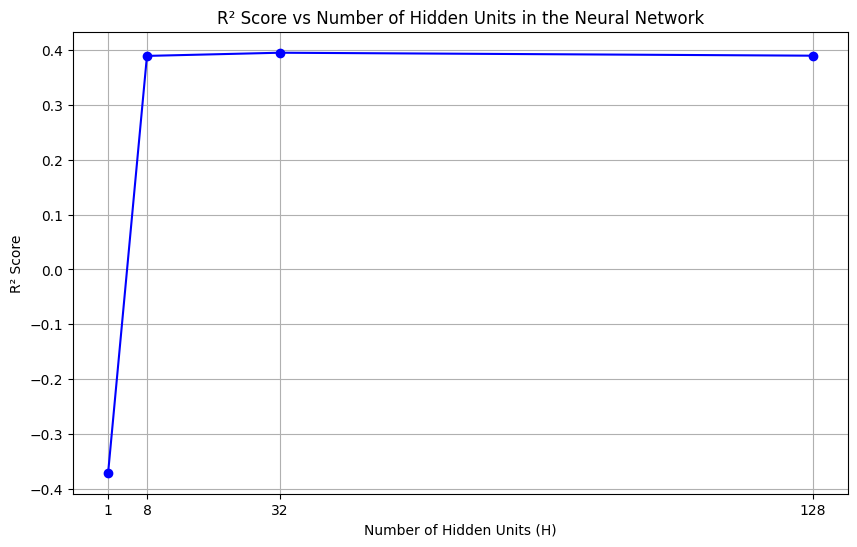

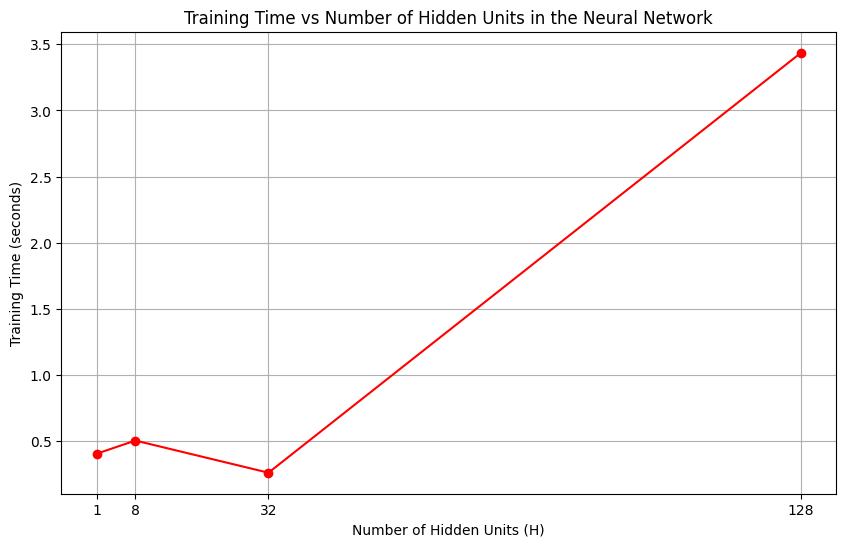

In [284]:
# Features and target variable
features_Q8 = ["c2","c3", "c4", "c8"]
X_train = X_train[features_Q8]  # Train data for the selected features
X_val = X_val[features_Q8]      # Validation data
y_train = y_train               # Target variable for training
y_val = y_val                   # Target variable for validation

# Hyperparameters for experiments
hidden_units_options = [1, 8, 32, 128]
r2_scores = []  # List to store R2 scores for plotting
mse_scores = []  # List to store MSE scores for reporting
training_times = []  # List to store training times

# Experiment with different hidden units
for H in hidden_units_options:
    print(f"\nTraining model with {H} hidden units...")

    # Define the MLP Regressor model with 3 hidden layers, each having H units
    model = MLPRegressor(
    hidden_layer_sizes=(H, H, H),
    early_stopping=True,
    max_iter=1000,
    random_state=4211,
    solver='adam',  # Specify the optimizer (adam is usually a good choice)
    tol=1e-4,  # Control the tolerance for convergence
    n_iter_no_change=10  # Number of iterations with no improvement before stopping
)


    # Record the start time
    start_time = time.time()

    # Train the model
    model.fit(X_train, y_train)

    # Record the training time
    training_time = time.time() - start_time
    training_times.append(training_time)

    # Make predictions on the validation set
    y_val_pred = model.predict(X_val)

    # Calculate the R² score on the validation set
    r2 = r2_score(y_val, y_val_pred)
    r2_scores.append(r2)

    # Calculate the Mean Squared Error (MSE) for reporting
    mse = mean_squared_error(y_val, y_val_pred)
    mse_scores.append(mse)

    # Print results for this model
    print(f"Training Time: {training_time:.2f} seconds")
    print(f"R² Score on Validation Set: {r2:.4f}")
    print(f"Mean Squared Error (MSE): {mse:.4f}")

# Plot the R² scores for each model
plt.figure(figsize=(10, 6))
plt.plot(hidden_units_options, r2_scores, marker='o', color='b', label='R² Score')
plt.title('R² Score vs Number of Hidden Units in the Neural Network')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('R² Score')
plt.grid(True)
plt.xticks(hidden_units_options)
plt.show()

# Plot the training time for each model
plt.figure(figsize=(10, 6))
plt.plot(hidden_units_options, training_times, marker='o', color='r', label='Training Time')
plt.title('Training Time vs Number of Hidden Units in the Neural Network')
plt.xlabel('Number of Hidden Units (H)')
plt.ylabel('Training Time (seconds)')
plt.grid(True)
plt.xticks(hidden_units_options)
plt.show()

# Does not ask to plot MSE results.


## Part 4: Classification

## [Q13 + Q14] 


Logistic Regression Model Results:
  Training Time: 0.0081 seconds
  Accuracy: 0.7263
  F1 Score: 0.6316
  AUC: 0.6928


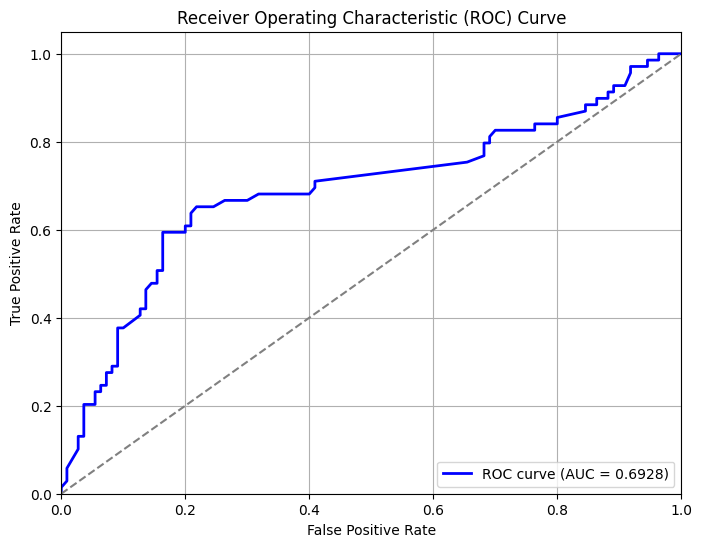

In [285]:

# Assuming df is your dataset
features_Q8 = ["c2", "c3", "c4", "c8"]  # Selected features
X = df[features_Q8].values  # Convert to NumPy array
y = df["class_target"].values  # Target variable (binary classification)

# Split data into training (80%) and validation (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=4211, stratify=y)

# Standardize features (important for gradient descent)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Train logistic regression model using SGD
model = SGDClassifier(loss="log_loss", learning_rate="optimal", eta0=1.0, random_state=4211)

# Measure training time
start_time = time.time()
model.fit(X_train, y_train)
training_time = time.time() - start_time

# Make predictions
y_pred = model.predict(X_val)
y_pred_proba = model.decision_function(X_val)  # For ROC curve

# Evaluate model performance
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Print results
print("\nLogistic Regression Model Results:")
print(f"  Training Time: {training_time:.4f} seconds")
print(f"  Accuracy: {accuracy:.4f}")
print(f"  F1 Score: {f1:.4f}")
print(f"  AUC: {roc_auc:.4f}")

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


## [Q15]

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.5887 - loss: 0.6925 - val_accuracy: 0.6145 - val_loss: 0.6909
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6199 - loss: 0.6902 - val_accuracy: 0.6145 - val_loss: 0.6889
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6058 - loss: 0.6889 - val_accuracy: 0.6145 - val_loss: 0.6874
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6201 - loss: 0.6867 - val_accuracy: 0.6145 - val_loss: 0.6858
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6314 - loss: 0.6842 - val_accuracy: 0.6145 - val_loss: 0.6842
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6131 - loss: 0.6839 - val_accuracy: 0.6145 - val_loss: 0.6827
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6506 - loss: 0.6786 - val_accuracy: 0.6145 - val_loss: 0.6813
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6032 - loss: 0.6824 - val_accuracy: 0.6145 - val_loss

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.6233 - loss: 0.6926 - val_accuracy: 0.6145 - val_loss: 0.6910
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6368 - loss: 0.6900 - val_accuracy: 0.6145 - val_loss: 0.6890
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6066 - loss: 0.6888 - val_accuracy: 0.6145 - val_loss: 0.6872
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6171 - loss: 0.6866 - val_accuracy: 0.6145 - val_loss: 0.6856
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6222 - loss: 0.6846 - val_accuracy: 0.6145 - val_loss: 0.6840
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6109 - loss: 0.6840 - val_accuracy: 0.6145 - val_loss: 0.6827
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6240 - loss: 0.6816 - val_accuracy: 0.6145 - val_loss: 0.6817
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5944 - loss: 0.6837 - val_accuracy: 0.6145 - val_loss: 0.6805
Ep

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.6171 - loss: 0.6925 - val_accuracy: 0.6145 - val_loss: 0.6908
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6224 - loss: 0.6901 - val_accuracy: 0.6145 - val_loss: 0.6888
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6503 - loss: 0.6870 - val_accuracy: 0.6145 - val_loss: 0.6871
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6149 - loss: 0.6867 - val_accuracy: 0.6145 - val_loss: 0.6855
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6002 - loss: 0.6862 - val_accuracy: 0.6145 - val_loss: 0.6841
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6017 - loss: 0.6848 - val_accuracy: 0.6145 - val_loss: 0.6826
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6466 - loss: 0.6789 - val_accuracy: 0.6145 - val_loss: 0.6812
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6085 - loss: 0.6817 - val_accuracy: 0.6145 - val_loss: 0.6801
Ep

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4917 - loss: 0.6857 - val_accuracy: 0.6927 - val_loss: 0.6767
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6611 - loss: 0.6804 - val_accuracy: 0.7430 - val_loss: 0.6718
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7026 - loss: 0.6726 - val_accuracy: 0.7486 - val_loss: 0.6650
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7065 - loss: 0.6640 - val_accuracy: 0.7430 - val_loss: 0.6553
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7107 - loss: 0.6509 - val_accuracy: 0.7318 - val_loss: 0.6433
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7102 - loss: 0.6410 - val_accuracy: 0.7318 - val_loss: 0.6302
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7079 - loss: 0.6261 - val_accuracy: 0.7263 - val_loss: 0.6139
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7155 - loss: 0.6097 - val_accuracy: 0.7263 - val_loss: 0.5973
Ep

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6317 - loss: 0.7261 - val_accuracy: 0.6145 - val_loss: 0.6997
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6129 - loss: 0.6870 - val_accuracy: 0.6145 - val_loss: 0.6760
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6145 - loss: 0.6677 - val_accuracy: 0.6145 - val_loss: 0.6547
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6196 - loss: 0.6496 - val_accuracy: 0.6145 - val_loss: 0.6365
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.6256 - val_accuracy: 0.6145 - val_loss: 0.6215
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6212 - loss: 0.6226 - val_accuracy: 0.6145 - val_loss: 0.6116
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6229 - loss: 0.6136 - val_accuracy: 0.6145 - val_loss: 0.6031
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6136 - loss: 0.6113 - val_accuracy: 0.6425 - val_loss: 0.5969
Epo

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6108 - loss: 0.7298 - val_accuracy: 0.6927 - val_loss: 0.6863
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6238 - loss: 0.6911 - val_accuracy: 0.6536 - val_loss: 0.6579
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6484 - loss: 0.6618 - val_accuracy: 0.6536 - val_loss: 0.6387
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6329 - loss: 0.6455 - val_accuracy: 0.6480 - val_loss: 0.6228
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.6376 - val_accuracy: 0.6592 - val_loss: 0.6113
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6795 - loss: 0.6109 - val_accuracy: 0.6760 - val_loss: 0.6014
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6321 - loss: 0.6175 - val_accuracy: 0.6927 - val_loss: 0.5942
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6379 - loss: 0.6174 - val_accuracy: 0.7095 - val_loss: 0.5878
Epo

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6167 - loss: 0.6670 - val_accuracy: 0.6425 - val_loss: 0.6257
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6474 - loss: 0.6194 - val_accuracy: 0.7263 - val_loss: 0.5837
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7116 - loss: 0.5800 - val_accuracy: 0.7318 - val_loss: 0.5657
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7345 - loss: 0.5630 - val_accuracy: 0.7430 - val_loss: 0.5614
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7478 - loss: 0.5484 - val_accuracy: 0.7486 - val_loss: 0.5608
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7205 - loss: 0.5549 - val_accuracy: 0.7486 - val_loss: 0.5597
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7104 - loss: 0.5701 - val_accuracy: 0.7486 - val_loss: 0.5620
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7550 - loss: 0.5344 - val_accuracy: 0.7374 - val_loss: 0.5623
Epo

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6178 - loss: 0.6739 - val_accuracy: 0.6201 - val_loss: 0.6341
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6341 - loss: 0.6264 - val_accuracy: 0.6927 - val_loss: 0.5914
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6698 - loss: 0.5947 - val_accuracy: 0.7374 - val_loss: 0.5676
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6923 - loss: 0.5904 - val_accuracy: 0.7430 - val_loss: 0.5632
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7123 - loss: 0.5594 - val_accuracy: 0.7486 - val_loss: 0.5596
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.6079 - val_accuracy: 0.7430 - val_loss: 0.5627
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7310 - loss: 0.5572 - val_accuracy: 0.7430 - val_loss: 0.5607
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7378 - loss: 0.5321 - val_accuracy: 0.7374 - val_loss: 0.5625
Ep

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.6116 - loss: 0.6813 - val_accuracy: 0.6145 - val_loss: 0.6427
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6402 - loss: 0.6261 - val_accuracy: 0.6257 - val_loss: 0.6109
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6680 - loss: 0.5900 - val_accuracy: 0.6927 - val_loss: 0.5825
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6944 - loss: 0.6096 - val_accuracy: 0.7430 - val_loss: 0.5698
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7055 - loss: 0.5777 - val_accuracy: 0.7430 - val_loss: 0.5638
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7173 - loss: 0.5659 - val_accuracy: 0.7486 - val_loss: 0.5618
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 0.5665 - val_accuracy: 0.7430 - val_loss: 0.5601
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7358 - loss: 0.5557 - val_accuracy: 0.7430 - val_loss: 0.5613
Epo

C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6164 - loss: 0.6625 - val_accuracy: 0.7430 - val_loss: 0.5664
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7063 - loss: 0.5854 - val_accuracy: 0.7263 - val_loss: 0.5852
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7103 - loss: 0.5751 - val_accuracy: 0.7374 - val_loss: 0.5765
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - loss: 0.5440 - val_accuracy: 0.7263 - val_loss: 0.5768
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7417 - loss: 0.5455 - val_accuracy: 0.7374 - val_loss: 0.5829
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.5336 - val_accuracy: 0.7318 - val_loss: 0.5747
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Epoch 1/50


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6568 - loss: 0.6482 - val_accuracy: 0.7430 - val_loss: 0.5666
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7177 - loss: 0.5756 - val_accuracy: 0.7486 - val_loss: 0.5714
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7344 - loss: 0.5596 - val_accuracy: 0.7430 - val_loss: 0.5704
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7523 - loss: 0.5368 - val_accuracy: 0.7207 - val_loss: 0.5686
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7351 - loss: 0.5665 - val_accuracy: 0.6872 - val_loss: 0.5979
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7143 - loss: 0.5765 - val_accuracy: 0.7374 - val_loss: 0.5812
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 
Epoch 1/50


C:\Users\andre\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6356 - loss: 0.6458 - val_accuracy: 0.7430 - val_loss: 0.5635
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7197 - loss: 0.5770 - val_accuracy: 0.7374 - val_loss: 0.5691
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7226 - loss: 0.5490 - val_accuracy: 0.7318 - val_loss: 0.5550
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6911 - loss: 0.5874 - val_accuracy: 0.7374 - val_loss: 0.5841
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7132 - loss: 0.5691 - val_accuracy: 0.7374 - val_loss: 0.5678
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7242 - loss: 0.5456 - val_accuracy: 0.7318 - val_loss: 0.5665
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7074 - loss: 0.5728 - val_accuracy: 0.7207 - val_loss: 0.5704
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7097 - loss: 0.5737 - val_accuracy: 0.7374 - val_loss: 0.5707
6/

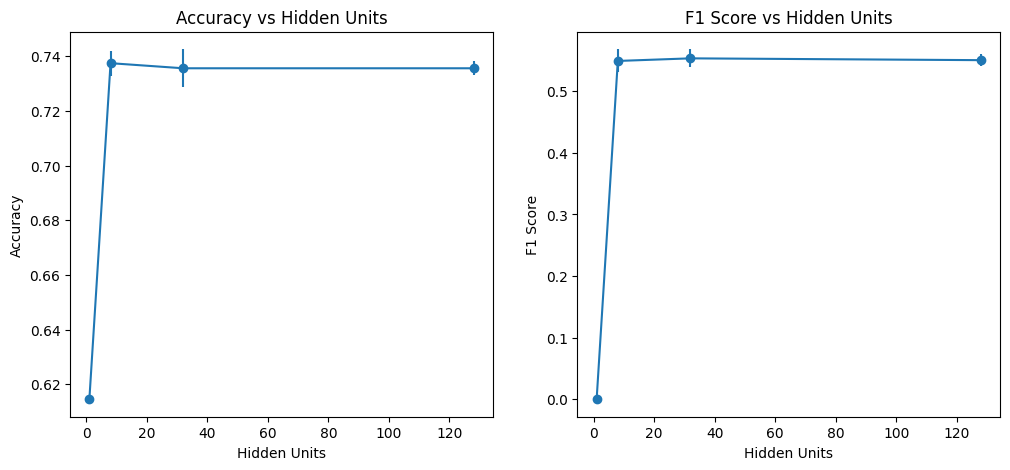

H=1: Accuracy=0.6145 ± 0.0000, F1=0.0000 ± 0.0000, Training Time=7.3818 ± 0.7122 sec
H=8: Accuracy=0.7374 ± 0.0046, F1=0.5491 ± 0.0186, Training Time=4.4285 ± 0.1892 sec
H=32: Accuracy=0.7356 ± 0.0070, F1=0.5533 ± 0.0148, Training Time=2.4713 ± 0.1407 sec
H=128: Accuracy=0.7356 ± 0.0026, F1=0.5503 ± 0.0094, Training Time=2.0365 ± 0.1122 sec


In [ ]:
# Hidden units to test
hidden_units = [1, 8, 32, 128]

# Store results
results = {}

for H in hidden_units:
    train_times, accuracies, f1_scores = [], [], []
    
    for _ in range(3):  # Repeat 3 times
        model = keras.Sequential([
            layers.Dense(H, activation='relu', input_shape=(X_train.shape[1],)),
            layers.Dense(H, activation='relu'),
            layers.Dense(H, activation='relu'),
            layers.Dense(1, activation='sigmoid')  # Binary classification
        ])
        
        model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
        
        start_time = time.time()
        model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),
                  callbacks=[keras.callbacks.EarlyStopping(patience=5)])
        train_time = time.time() - start_time
        
        y_pred = (model.predict(X_val) > 0.5).astype(int)
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        
        train_times.append(train_time)
        accuracies.append(accuracy)
        f1_scores.append(f1)
    
    results[H] = {
        'train_time_mean': np.mean(train_times), 'train_time_std': np.std(train_times),
        'accuracy_mean': np.mean(accuracies), 'accuracy_std': np.std(accuracies),
        'f1_mean': np.mean(f1_scores), 'f1_std': np.std(f1_scores)
    }

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].errorbar(hidden_units, [results[H]['accuracy_mean'] for H in hidden_units],
               yerr=[results[H]['accuracy_std'] for H in hidden_units], label='Accuracy', fmt='-o')
ax[1].errorbar(hidden_units, [results[H]['f1_mean'] for H in hidden_units],
               yerr=[results[H]['f1_std'] for H in hidden_units], label='F1 Score', fmt='-o')
ax[0].set_title("Accuracy vs Hidden Units")
ax[1].set_title("F1 Score vs Hidden Units")
ax[0].set_xlabel("Hidden Units")
ax[1].set_xlabel("Hidden Units")
ax[0].set_ylabel("Accuracy")
ax[1].set_ylabel("F1 Score")
plt.show()

# Print results
for H, res in results.items():
    print(f"H={H}: Accuracy={res['accuracy_mean']:.4f} ± {res['accuracy_std']:.4f}, "
          f"F1={res['f1_mean']:.4f} ± {res['f1_std']:.4f}, "
          f"Training Time={res['train_time_mean']:.4f} ± {res['train_time_std']:.4f} sec")


In [ ]:
# Train and evaluate models for H=1 and H=128
hidden_layer_sizes = [1, 128]

# Store fpr, tpr, and auc for ROC curve
roc_data = {}

for H in hidden_layer_sizes:
    # Train the model
    model = keras.Sequential([
        layers.Dense(H, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(H, activation='relu'),
        layers.Dense(H, activation='relu'),
        layers.Dense(1, activation='sigmoid')  # Binary classification
    ])
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val),
              callbacks=[keras.callbacks.EarlyStopping(patience=5)])
    
    # Predict probabilities (for ROC curve)
    y_prob = model.predict(X_val)
    
    # Compute ROC curve
    fpr, tpr, thresholds = roc_curve(y_val, y_prob)
    roc_auc = auc(fpr, tpr)
    
    roc_data[H] = {'fpr': fpr, 'tpr': tpr, 'auc': roc_auc}

# Plot ROC curves for both hidden sizes
plt.figure(figsize=(8, 6))
for H in hidden_layer_sizes:
    plt.plot(roc_data[H]['fpr'], roc_data[H]['tpr'], label=f'H={H}, AUC={roc_data[H]["auc"]:.4f}')
    
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Random classifier line
plt.title('ROC Curve for H=1 and H=128')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()